## Choix du cluster

In [4]:
from pandas import read_csv,to_datetime, DataFrame, merge
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import zscore
import os
from statsmodels.tsa.seasonal import seasonal_decompose
from ydata_profiling import ProfileReport
from numpy import array, newaxis
from tslearn.clustering import TimeSeriesKMeans, silhouette_score,KShape, KernelKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

In [2]:
# Charger les données
AlldfContinent = read_csv("D:\Alternance_2023_UTT\MS EBDE UTT 23 Prof thesis\Sample_Data\Processed\Product families over time.csv")

# Transposer le DataFrame pour obtenir les Product Families comme colonnes
df2 = AlldfContinent.set_index('Product Family').T
df2.index = to_datetime(df2.index)
X = df2.T.values
product_families = df2.columns

<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
D:\WK\ydongue\AppData\Local\Temp\ipykernel_3400\421283029.py:2: SyntaxWarning: invalid escape sequence '\A'
  AlldfContinent = read_csv("D:\Alternance_2023_UTT\MS EBDE UTT 23 Prof thesis\Sample_Data\Processed\Product families over time.csv")


In [ ]:
series_scaled = zscore(X)
n_clusters = 3  # Nombre de clusters souhaité
mtr = "laplacian"
model = KernelKMeans(n_clusters=n_clusters, kernel=mtr, n_init=150, max_iter=100, random_state=0)
labels = model.fit_predict(series_scaled)

results_dfkernelKmeans = DataFrame({
    'productfamilies': product_families,
    'clusters': labels})

print(results_dfkernelKmeans)

results_dfkernelKmeans.to_csv("D:\Alternance_2023_UTT\MS EBDE UTT 23 Prof thesis\Sample_Data\For_Modeling\clustered_product_families.csv", index=False)


## Tracé des Barycentre des séries par cluster

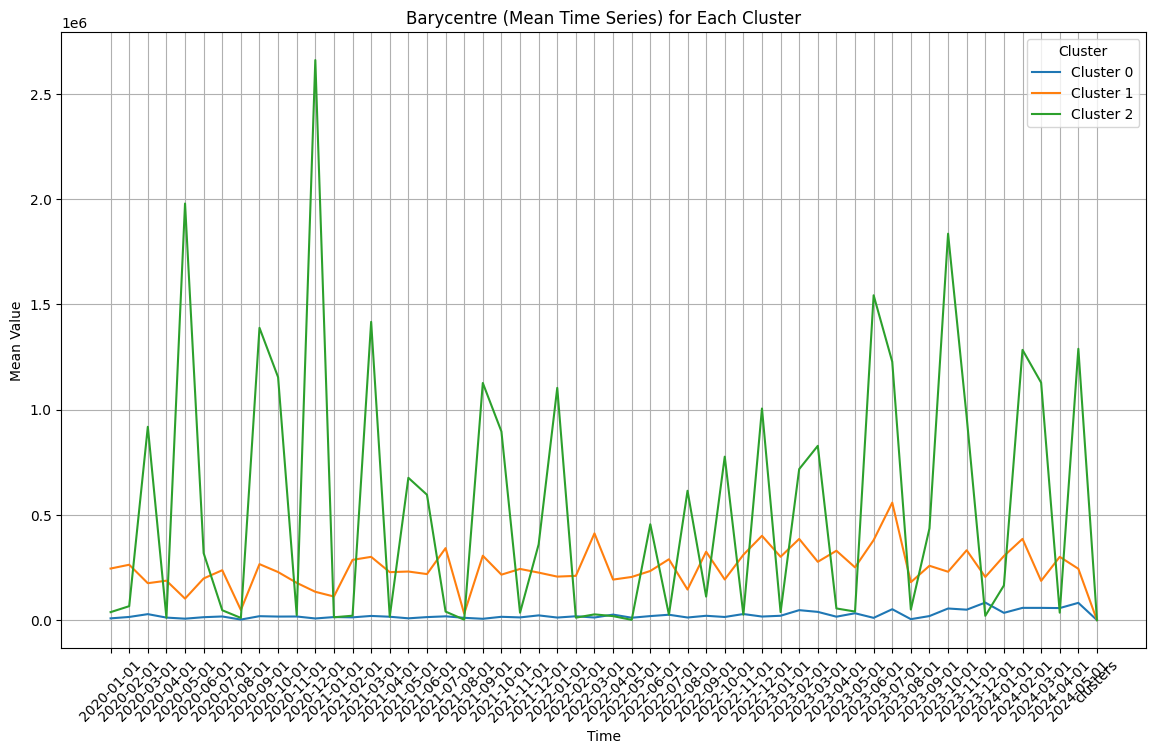

In [6]:
# Assurez-vous de copier les bonnes données dans les DataFrames
time_series_df = AlldfContinent.copy()
clusters_df = results_dfkernelKmeans.copy()

# Fusionner les séries temporelles avec les informations de cluster
merged_df = merge(time_series_df, clusters_df, left_on='Product Family', right_on='productfamilies')
merged_df.drop(columns=['productfamilies'], inplace=True)

# Sélectionner uniquement les colonnes numériques
numeric_columns = merged_df.select_dtypes(include=['number']).columns

# Calculer la moyenne (barycentre) pour chaque cluster en utilisant uniquement les colonnes numériques
cluster_means = merged_df.groupby('clusters')[numeric_columns].mean()

# Tracer les barycentres pour chaque cluster
plt.figure(figsize=(14, 8))
for cluster in cluster_means.index:
    plt.plot(cluster_means.columns, cluster_means.loc[cluster], label=f'Cluster {cluster}')

plt.title('Barycentre (Mean Time Series) for Each Cluster')
plt.xlabel('Time')
plt.ylabel('Mean Value')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()